In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


import os
from matplotlib import pyplot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore


import warnings                                                                 
warnings.filterwarnings('ignore') 

# allow plots to appear directly in the notebook
%matplotlib inline

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity

In [57]:
# Get the CSV data here and print head
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [58]:
train_data = pd.read_excel("data_train.xlsx")
pd.set_option('display.max_columns', None)
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [59]:
train_data.shape

(10683, 11)

In [60]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [61]:
train_data.Additional_Info

0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10683, dtype: object

In [62]:
train_data["Route"].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [63]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [64]:
train_data.dropna(inplace = True)

In [65]:
train_data[train_data.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [66]:
train_data.drop_duplicates(keep='first',inplace=True)
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [67]:
train_data.shape

(10462, 11)

In [68]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [69]:
train_data.shape

(10462, 11)

In [70]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [71]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [72]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [73]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [74]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour



In [75]:
# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [76]:
train_data.shape

(10462, 13)

In [77]:
train_data

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [78]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [79]:
train_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [80]:
#WORKING ON TEST DATA

In [81]:
test_data = pd.read_excel("Test_set.xlsx")
pd.set_option('display.max_columns', None)
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [82]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [83]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [84]:
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [85]:
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [86]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [87]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [88]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour

In [89]:
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,6
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,8
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23


In [90]:
# Extracting Minutes
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute

In [91]:
# Now we can drop Dep_Time as it is of no use
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [92]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour

# Extracting Minutes
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute



In [93]:
# Now we can drop Arrival_Time as it is of no use
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [94]:
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


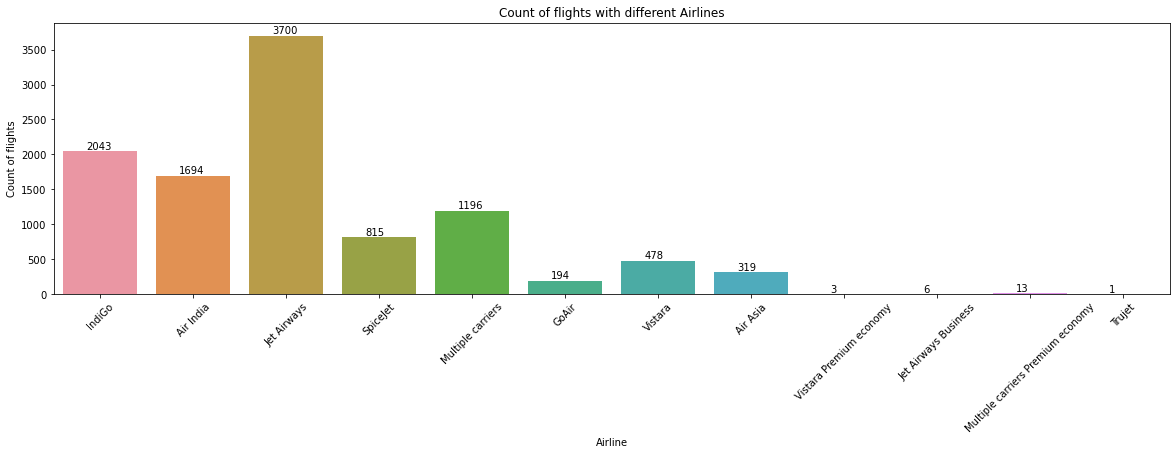

In [95]:
#Jet airways has most number of flights
#Flight and count
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data=train_data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

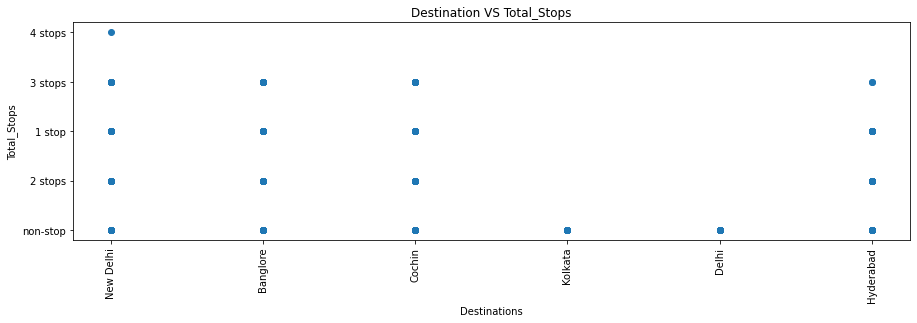

In [96]:
#destination and total stops
#New Delhi has max stops
plt.figure(figsize = (15,4))
plt.title('Destination VS Total_Stops')
plt.scatter(train_data['Destination'], train_data['Total_Stops'])
plt.xticks
plt.xlabel('Destinations')
plt.ylabel('Total_Stops')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

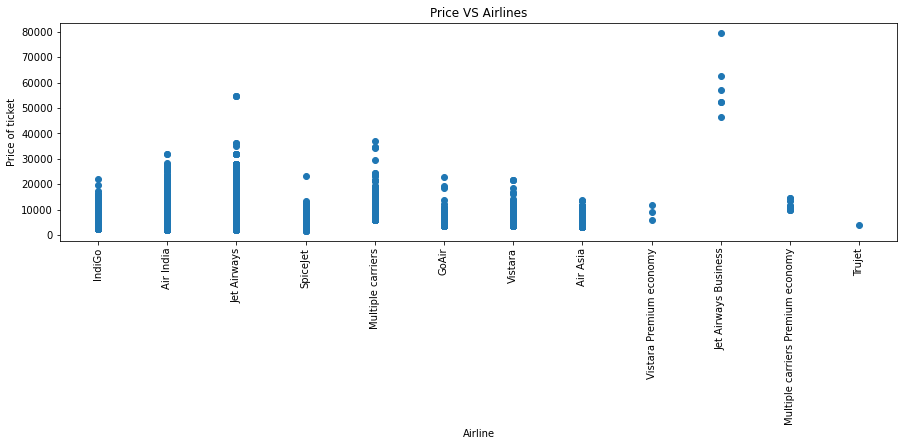

In [97]:
#Airline VS duration  - Jet Airways business is the costliest, followed by Jet Airways
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(train_data['Airline'], train_data['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''

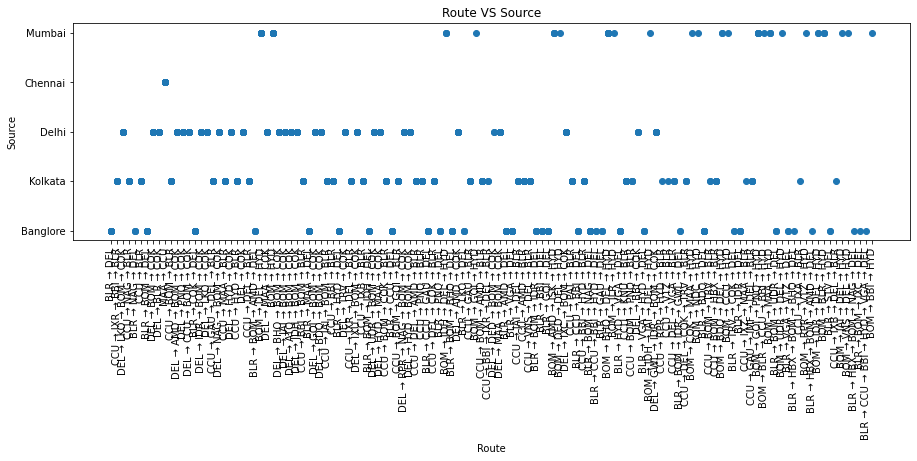

In [98]:
#Route and source
plt.figure(figsize = (15,4))
plt.title('Route VS Source')
plt.scatter(train_data['Route'], train_data['Source'])
plt.xticks
plt.xlabel('Route')
plt.ylabel('Source')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

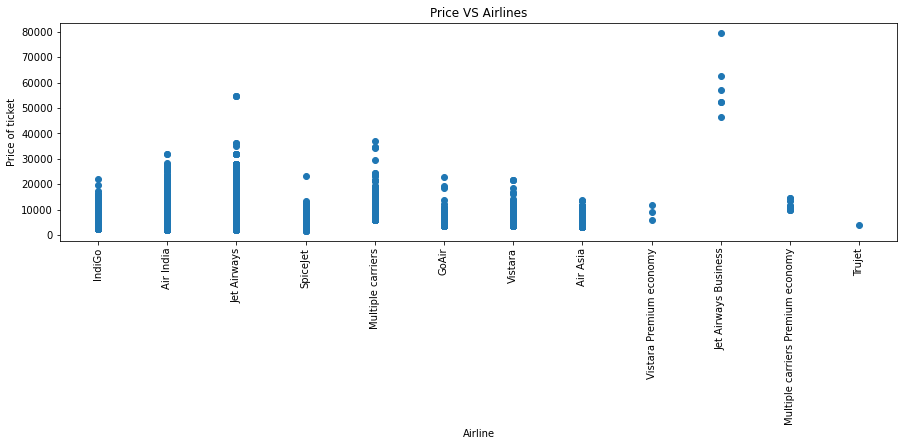

In [99]:
#Airline VS duration  - Jet Airways business is the costliest, followed by Jet Airways
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(train_data['Airline'], train_data['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.,  90000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

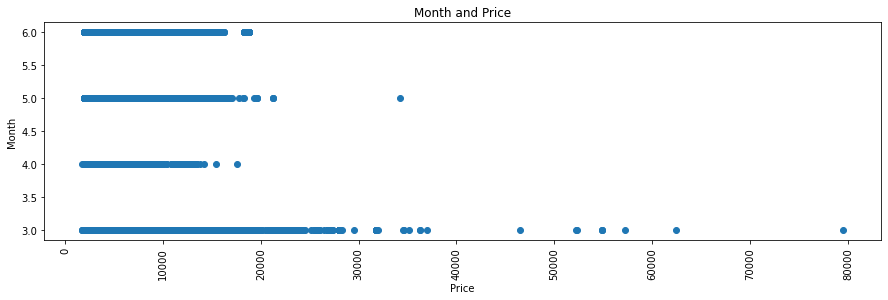

In [100]:
#Airline Vs journey month
#The 3rd month has max price

plt.figure(figsize = (15,4))
plt.title('Month and Price')
plt.scatter(train_data['Price'], train_data['Journey_month'])
plt.xticks
plt.xlabel('Price')
plt.ylabel('Month')
plt.xticks(rotation = 90)

In [101]:
 #converting hours in minutes for duration column in train and test data
train_data['Duration'] = train_data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_data['Duration'] = test_data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [102]:
test_data.Duration

0        655
1        240
2       1425
3        780
4        170
        ... 
2666    1435
2667     155
2668     395
2669     915
2670     860
Name: Duration, Length: 2671, dtype: int64

In [103]:
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,24,6,23,55,2,45


In [104]:
train_data.head() #converting hojurs in minutes

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


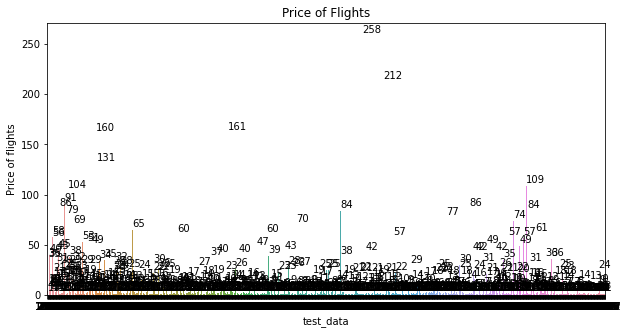

In [105]:
plt.figure(figsize = (10, 5))
plt.title('Price of Flights')
ax=sns.countplot(x = 'Price', data = train_data)
plt.xlabel('test_data')
plt.ylabel('Price of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

In [106]:
# Label ecoding for train data
from sklearn.preprocessing import LabelEncoder
for col in train_data.columns:
    if train_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        train_data[col] = encoder.fit_transform(train_data[col])

In [107]:
# Label ecoding for test data
from sklearn.preprocessing import LabelEncoder
for col in test_data.columns:
    if test_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        test_data[col] = encoder.fit_transform(test_data[col])

In [108]:
train_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,170,4,8,3897,24,3,22,20,1,10
1,1,3,0,84,445,1,8,7662,1,5,5,50,13,15
2,4,2,1,118,1140,1,8,13882,9,6,9,25,4,25
3,3,3,0,91,325,0,8,6218,12,5,18,5,23,30
4,3,0,5,29,285,0,8,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,150,4,8,4107,9,4,19,55,22,25
10679,1,3,0,64,155,4,8,4145,27,4,20,45,23,20
10680,4,0,2,18,180,4,8,7229,27,4,8,20,11,20
10681,10,0,5,18,160,4,8,12648,1,3,11,30,14,10


In [109]:
test_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,4,2,1,76,655,0,5,6,6,17,30,4,25
1,3,3,0,65,240,0,5,12,5,6,20,10,20
2,4,2,1,76,1425,0,3,21,5,19,15,19,0
3,6,2,1,76,780,0,5,21,5,8,0,21,0
4,0,0,2,16,170,4,5,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,1435,0,5,6,6,20,30,20,25
2667,3,3,0,43,155,4,5,27,3,14,20,16,55
2668,4,2,1,76,395,0,5,6,3,21,50,4,25
2669,1,2,1,76,915,0,5,6,3,4,0,19,15


<AxesSubplot:>

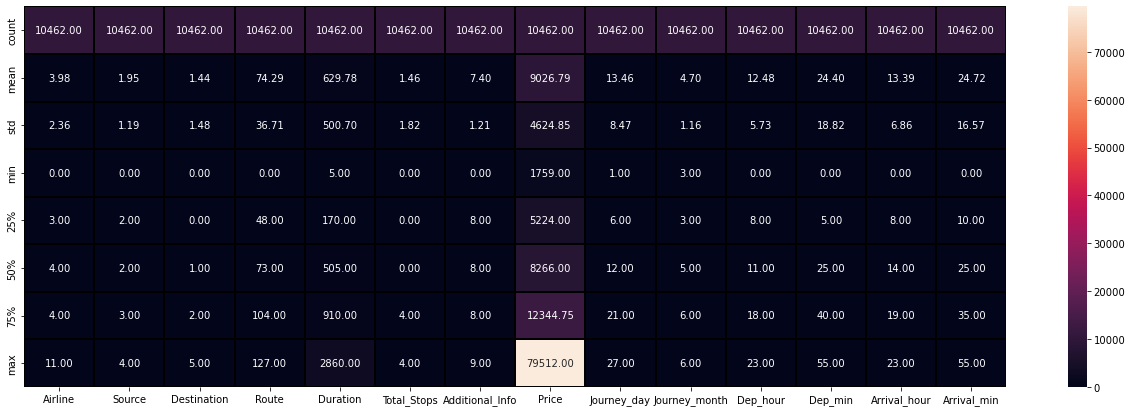

In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(train_data.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

<AxesSubplot:>

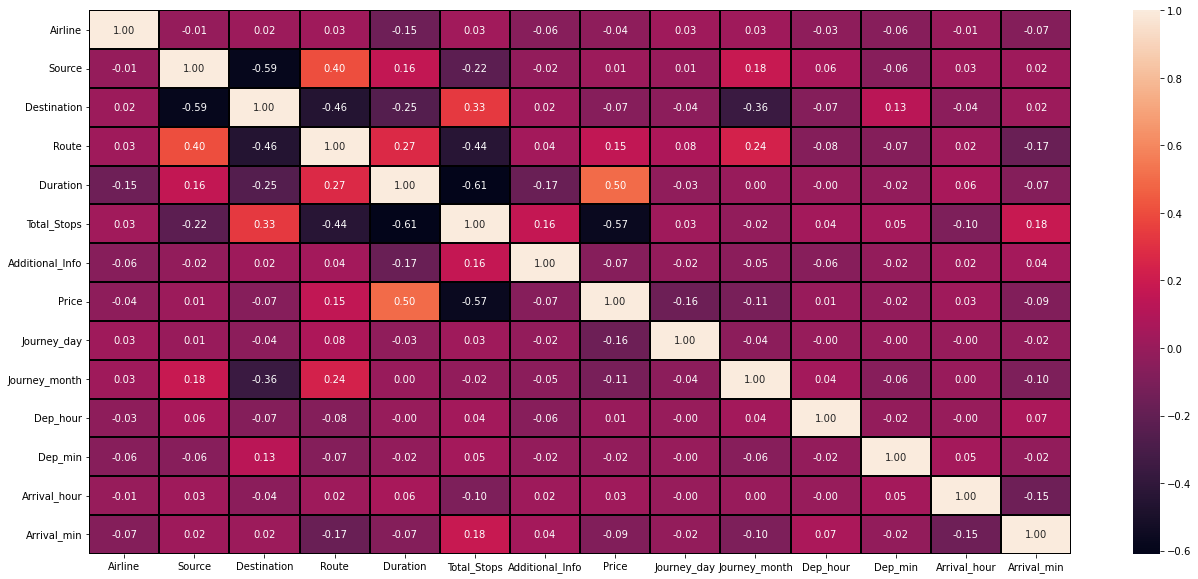

In [111]:
plt.figure(figsize=(22,10))
sns.heatmap(train_data.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

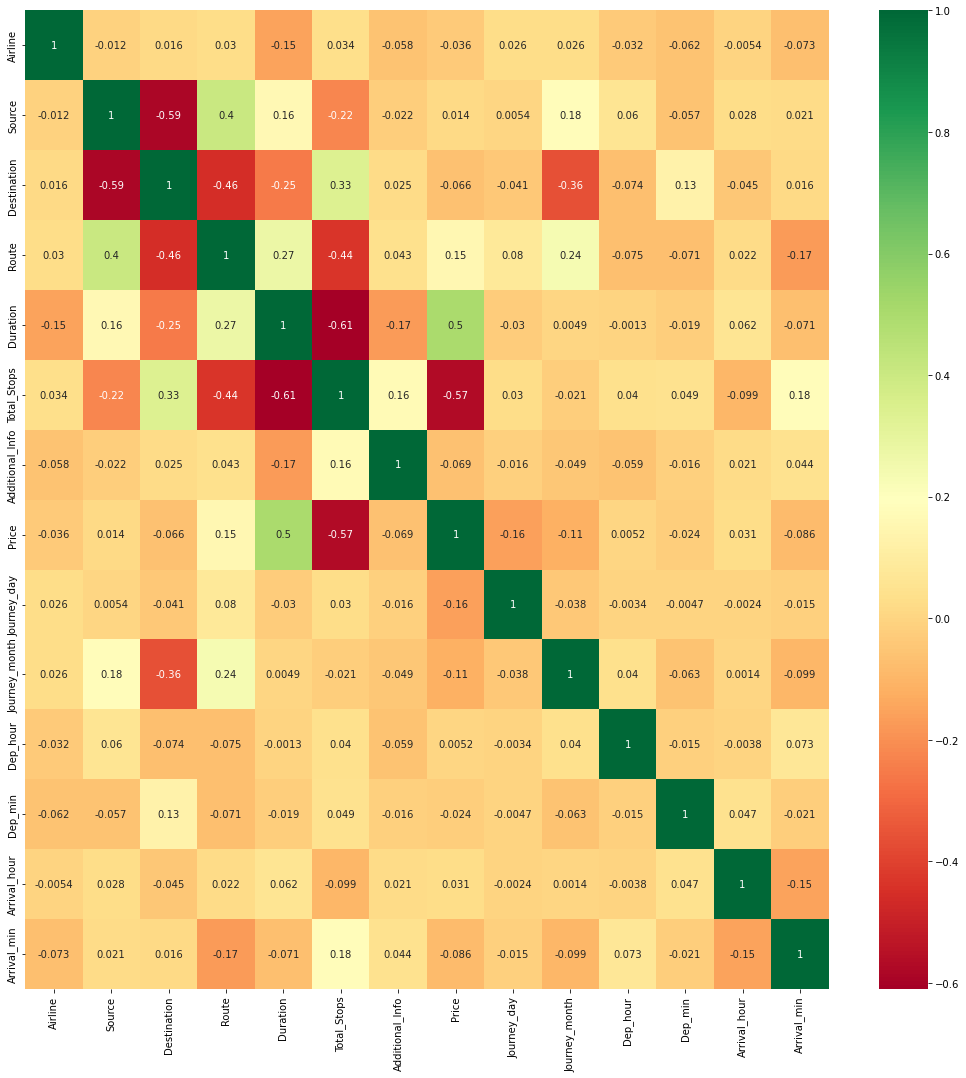

In [112]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.,  90000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

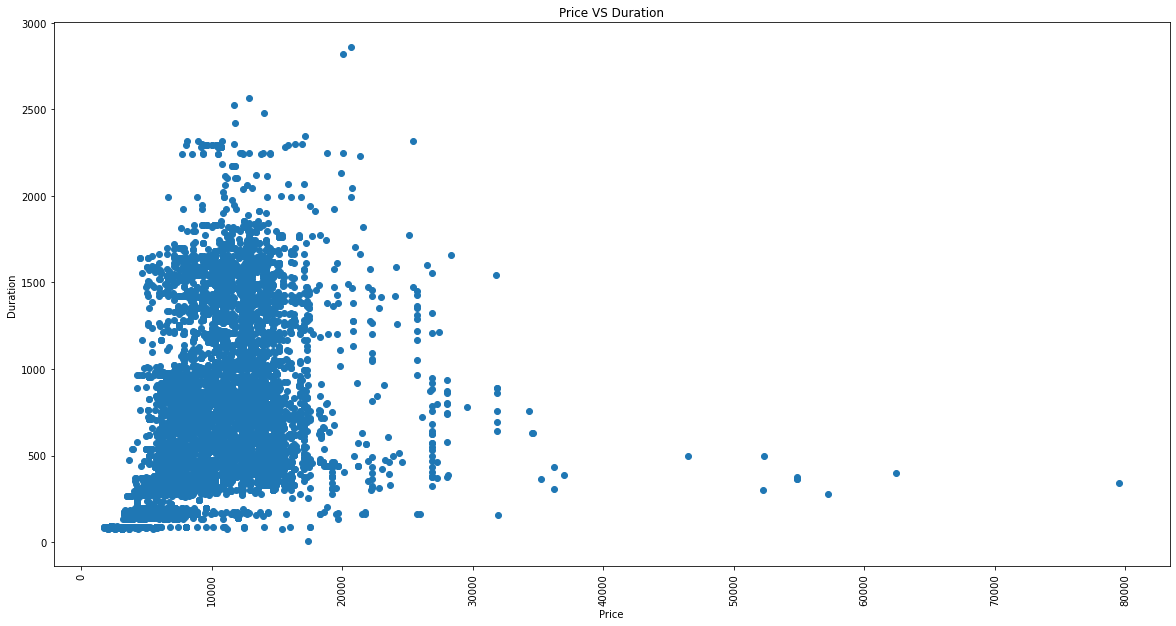

In [113]:
#there is a relation between price and duration

#Price and duration
plt.figure(figsize = (20,10))
plt.title('Price VS Duration')
plt.scatter(train_data['Price'], train_data['Duration'])
plt.xticks
plt.xlabel('Price')
plt.ylabel('Duration')
plt.xticks(rotation = 90)

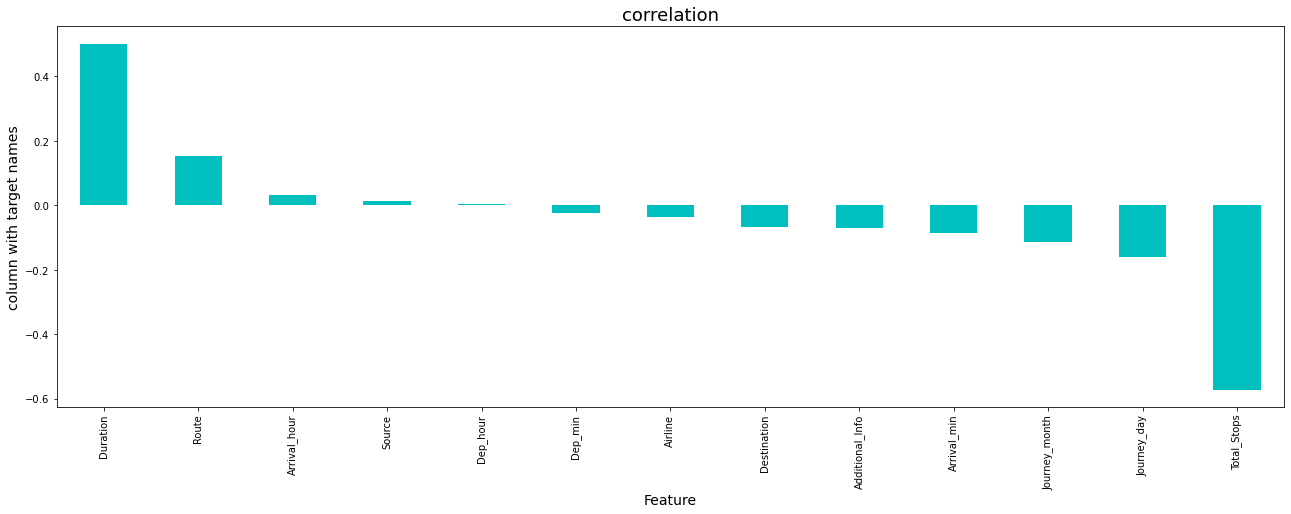

In [114]:
#CORELATION WITH Price
plt.figure(figsize=(22,7))
train_data.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation', fontsize=18)
plt.show()

In [115]:
train_data.corr()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
Airline,1.000000,-0.012172,0.015942,0.029636,-0.153618,0.034396,-0.058220,-0.036491,0.026482,0.026083,-0.032267,-0.062421,-0.005438,-0.073045
Source,-0.012172,1.000000,-0.589992,0.403884,0.162808,-0.222859,-0.021587,0.013796,0.005440,0.181072,0.060218,-0.056609,0.028257,0.021392
Destination,0.015942,-0.589992,1.000000,-0.457559,-0.254243,0.334097,0.024922,-0.065875,-0.040994,-0.362186,-0.074056,0.128523,-0.044605,0.016351
Route,0.029636,0.403884,-0.457559,1.000000,0.273200,-0.436066,0.042804,0.154374,0.079747,0.236674,-0.075188,-0.070978,0.021612,-0.174172
Duration,-0.153618,0.162808,-0.254243,0.273200,1.000000,-0.609794,-0.169939,0.501758,-0.029810,0.004874,-0.001285,-0.019225,0.061912,-0.070977
Total_Stops,0.034396,-0.222859,0.334097,-0.436066,-0.609794,1.000000,0.164639,-0.571991,0.030271,-0.021409,0.040310,0.049338,-0.099351,0.176743
Additional_Info,-0.058220,-0.021587,0.024922,0.042804,-0.169939,0.164639,1.000000,-0.068779,-0.016443,-0.049186,-0.059406,-0.015916,0.021293,0.044321
Price,-0.036491,0.013796,-0.065875,0.154374,0.501758,-0.571991,-0.068779,1.000000,-0.159044,-0.113396,0.005155,-0.024155,0.031023,-0.086163
Journey_day,0.026482,0.005440,-0.040994,0.079747,-0.029810,0.030271,-0.016443,-0.159044,1.000000,-0.038331,-0.003394,-0.004741,-0.002448,-0.015086
Journey_month,0.026083,0.181072,-0.362186,0.236674,0.004874,-0.021409,-0.049186,-0.113396,-0.038331,1.000000,0.040406,-0.062636,0.001423,-0.099261


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

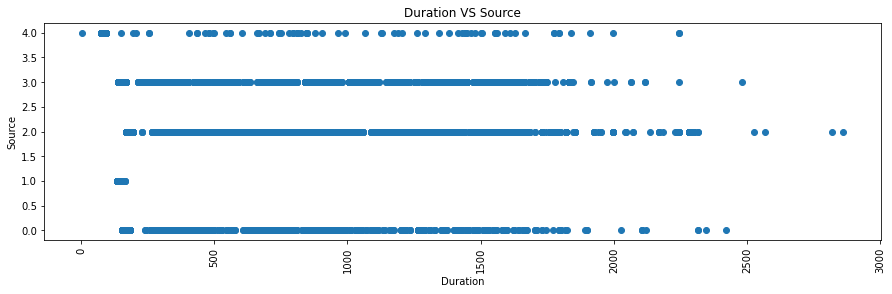

In [116]:
#source and duration, deaination and source, 

plt.figure(figsize = (15,4))
plt.title('Duration VS Source')
plt.scatter(train_data['Duration'], train_data['Source'])
plt.xticks
plt.xlabel('Duration')
plt.ylabel('Source')
plt.xticks(rotation = 90)


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

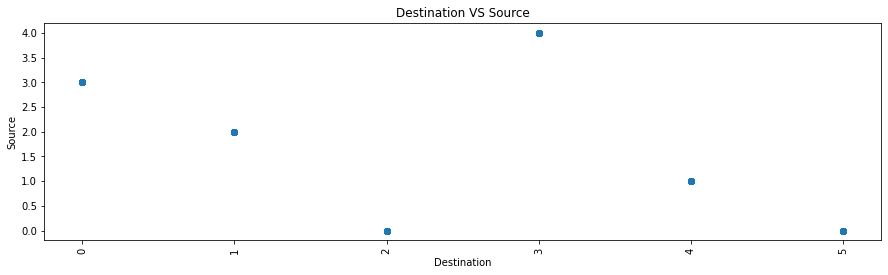

In [117]:
plt.figure(figsize = (15,4))
plt.title('Destination VS Source')
plt.scatter(train_data['Destination'], train_data['Source'])
plt.xticks
plt.xlabel('Destination')
plt.ylabel('Source')
plt.xticks(rotation = 90)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.,  90000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

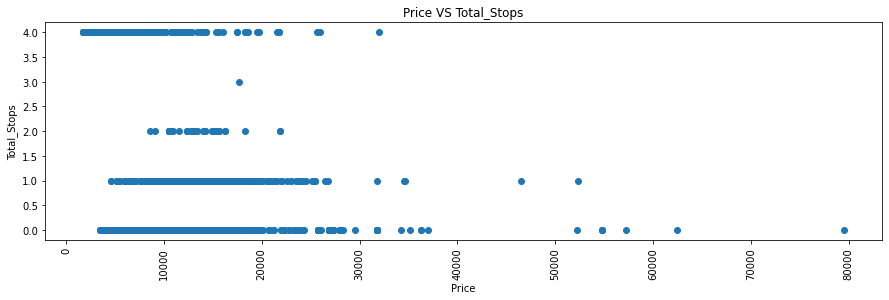

In [118]:
#There seems to be a negative correlation between price and total stops
plt.figure(figsize = (15,4))
plt.title('Price VS Total_Stops')
plt.scatter(train_data['Price'], train_data['Total_Stops'])
plt.xticks
plt.xlabel('Price')
plt.ylabel('Total_Stops')
plt.xticks(rotation = 90)

In [119]:
#check skewness
train_data.skew().sort_values(ascending=False)

Price              1.857490
Destination        1.225081
Duration           0.903973
Airline            0.723567
Total_Stops        0.617105
Dep_min            0.171301
Journey_day        0.124628
Arrival_min        0.110802
Dep_hour           0.108306
Journey_month     -0.377535
Arrival_hour      -0.378978
Source            -0.419669
Route             -0.481865
Additional_Info   -1.796501
dtype: float64

In [120]:
#we dont see much skewness in dat. for price, we see skewness, but price is a target column so it doesnot matter

In [121]:
X = train_data.drop('Price', axis=1)
y = train_data['Price']


In [122]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(X)
x

array([[-0.41491593, -1.64687738,  2.40421327, ..., -0.2341234 ,
        -1.8070449 , -0.88836709],
       [-1.26075586,  0.88205718, -0.97201213, ...,  1.36036441,
        -0.05655381, -0.58661071],
       [ 0.00800403,  0.03907899, -0.29676705, ...,  0.03162457,
        -1.36942213,  0.01690205],
       ...,
       [ 0.00800403, -1.64687738,  0.37847803, ..., -0.2341234 ,
        -0.34830233, -0.28485433],
       [ 2.5455238 , -1.64687738,  2.40421327, ...,  0.29737254,
         0.08932044, -0.88836709],
       [-1.26075586,  0.03907899, -0.29676705, ...,  1.62611238,
         0.81869173, -0.58661071]])

In [123]:
pd.DataFrame(x, columns=X.columns).skew().sort_values(ascending=False) 

Destination        1.225081
Duration           0.903973
Airline            0.723567
Total_Stops        0.617105
Dep_min            0.171301
Journey_day        0.124628
Arrival_min        0.110802
Dep_hour           0.108306
Journey_month     -0.377535
Arrival_hour      -0.378978
Source            -0.419669
Route             -0.481865
Additional_Info   -1.796501
dtype: float64

In [124]:
x=pd.DataFrame(x, columns=X.columns)

In [125]:
x.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [181]:
#using linear regression
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr=LinearRegression()

In [182]:
from sklearn.metrics import r2_score
for i in range(0,300):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train, pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.40824192571002393
At random state 0,the testing accuracy is:- 0.4487031676784383


At random state 1,the training accuracy is:- 0.4094185794506897
At random state 1,the testing accuracy is:- 0.4463728531132166


At random state 2,the training accuracy is:- 0.4425572389887261
At random state 2,the testing accuracy is:- 0.3545321689988462


At random state 3,the training accuracy is:- 0.4139354739967728
At random state 3,the testing accuracy is:- 0.43220613610252645


At random state 4,the training accuracy is:- 0.4165225234309593
At random state 4,the testing accuracy is:- 0.4241470699159746


At random state 5,the training accuracy is:- 0.4147216446032874
At random state 5,the testing accuracy is:- 0.4284430398578043


At random state 6,the training accuracy is:- 0.423307561005992
At random state 6,the testing accuracy is:- 0.4022499090777618


At random state 7,the training accuracy is:- 0.4135243722771418
At random state 7,the testing ac

At random state 69,the testing accuracy is:- 0.41412691295961757


At random state 70,the training accuracy is:- 0.42319220294164983
At random state 70,the testing accuracy is:- 0.4055848604655222


At random state 71,the training accuracy is:- 0.4142882546570994
At random state 71,the testing accuracy is:- 0.43128585219466287


At random state 72,the training accuracy is:- 0.4234398091031999
At random state 72,the testing accuracy is:- 0.4028786285871713


At random state 73,the training accuracy is:- 0.4245105091593713
At random state 73,the testing accuracy is:- 0.40114860178677303


At random state 74,the training accuracy is:- 0.41883867090307014
At random state 74,the testing accuracy is:- 0.41630508650464837


At random state 75,the training accuracy is:- 0.4049227819201856
At random state 75,the testing accuracy is:- 0.46062792429289456


At random state 76,the training accuracy is:- 0.41713657292312323
At random state 76,the testing accuracy is:- 0.4222874676031648


At random

At random state 138,the training accuracy is:- 0.4145703131397179
At random state 138,the testing accuracy is:- 0.4302523917664033


At random state 139,the training accuracy is:- 0.41371381395743734
At random state 139,the testing accuracy is:- 0.4314546498904457


At random state 140,the training accuracy is:- 0.4122736407484697
At random state 140,the testing accuracy is:- 0.4361633202607189


At random state 141,the training accuracy is:- 0.41058861727078255
At random state 141,the testing accuracy is:- 0.4430913862600029


At random state 142,the training accuracy is:- 0.4306107883933915
At random state 142,the testing accuracy is:- 0.3852988487742446


At random state 143,the training accuracy is:- 0.40837684262473806
At random state 143,the testing accuracy is:- 0.4509139300329209


At random state 144,the training accuracy is:- 0.41352935300807114
At random state 144,the testing accuracy is:- 0.4339783649845843


At random state 145,the training accuracy is:- 0.4196649594710223

At random state 199,the testing accuracy is:- 0.40056138542984865


At random state 200,the training accuracy is:- 0.41628975655066325
At random state 200,the testing accuracy is:- 0.4237570277218957


At random state 201,the training accuracy is:- 0.42373958491247654
At random state 201,the testing accuracy is:- 0.40266240966374733


At random state 202,the training accuracy is:- 0.4251036921870416
At random state 202,the testing accuracy is:- 0.398599518911689


At random state 203,the training accuracy is:- 0.4298080232245939
At random state 203,the testing accuracy is:- 0.3887328809160494


At random state 204,the training accuracy is:- 0.4165605878391454
At random state 204,the testing accuracy is:- 0.4233174386774935


At random state 205,the training accuracy is:- 0.4128221364959337
At random state 205,the testing accuracy is:- 0.4349189432370988


At random state 206,the training accuracy is:- 0.42855455371883777
At random state 206,the testing accuracy is:- 0.38974220086894906

At random state 268,the testing accuracy is:- 0.4309220593191927


At random state 269,the training accuracy is:- 0.40615057850590686
At random state 269,the testing accuracy is:- 0.45711246379108206


At random state 270,the training accuracy is:- 0.42221082796928955
At random state 270,the testing accuracy is:- 0.407166967611741


At random state 271,the training accuracy is:- 0.4094152521952005
At random state 271,the testing accuracy is:- 0.44822284101774057


At random state 272,the training accuracy is:- 0.40883025856679434
At random state 272,the testing accuracy is:- 0.44744105488395236


At random state 273,the training accuracy is:- 0.4149221183200016
At random state 273,the testing accuracy is:- 0.4284004430124524


At random state 274,the training accuracy is:- 0.41344520028924536
At random state 274,the testing accuracy is:- 0.43346595045962577


At random state 275,the training accuracy is:- 0.42227135259464366
At random state 275,the testing accuracy is:- 0.4076584104985

In [187]:
x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size=0.25, random_state=14)

In [188]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [189]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 2418.7993170890963
MSE: 10512848.7862844
RMSE: 3242.352353814187


In [190]:
lr.score(x_train , y_train)

0.40823118428992156

In [191]:
#With descision tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
predD=dt.predict(x_test)

In [192]:
print('MAE:', metrics.mean_absolute_error(y_test, predD))
print('MSE:', metrics.mean_squared_error(y_test, predD))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predD)))

MAE: 743.0047782874618
MSE: 4862230.752389144
RMSE: 2205.046655376966


In [193]:
dt.score(x_train , y_train)

0.9955889322370732

In [194]:
#With random forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
predR=rfr.predict(x_test)

In [195]:
print('MAE:', metrics.mean_absolute_error(y_test, predR))
print('MSE:', metrics.mean_squared_error(y_test, predR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predR)))

MAE: 643.6509390775933
MSE: 2143355.5515423995
RMSE: 1464.0203385002544


In [196]:
rfr.score(x_train , y_train)

0.977947302920372

In [197]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
predA=ada.predict(x_test)

In [198]:
print('MAE:', metrics.mean_absolute_error(y_test, predA))
print('MSE:', metrics.mean_squared_error(y_test, predA))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predA)))

MAE: 3324.1082879564074
MSE: 15790219.079370167
RMSE: 3973.690863588934


In [199]:
ada.score(x_train , y_train)

0.28610411554863546

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [201]:
params = {'n_estimators': [47,50,60,70], 'learning_rate': [0.1, 0.25,0.30,0.40]}

In [202]:
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(), cv=5, param_distributions=params)

In [203]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.1, 0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [204]:
ada=AdaBoostRegressor(learning_rate=0.3,n_estimators=60)
ada.fit(x_train,y_train) #this is our score
predA= ada.predict(x_test)
print ('*****accuracy post tuning*****')
print (metrics.r2_score(y_test,predA))

*****accuracy post tuning*****
0.4155554442335604


,Y Test,Pred
5947,10573,16697.0
5183,7229,7229.0
2781,3943,3943.0
4566,13591,14960.0
5866,10413,10623.0


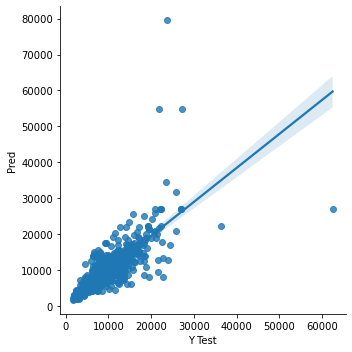

In [205]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':predD},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

,Y Test,Pred
5947,10573,13458.956667
5183,7229,7229.000000
2781,3943,3966.010000
4566,13591,13792.870000
5866,10413,10485.610000


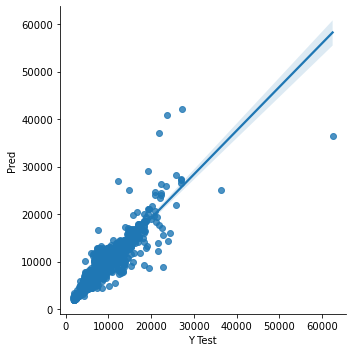

In [207]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':predR},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [ ]:
#Thus we can see, we are getting better accuracy with Random forest
#10,000-20,000 seems to be the range for pricing

In [212]:
rf_tuning=rf.fit(x_train,y_train)

In [ ]:
import pickle as pkl
Income_Census_Model= 'Income_Census.pickle'
pkl.dump(adb_tuning, open(Income_Census_Model,'wb'))